## 1. Import and warehouse data: 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Import data: 

In [2]:
df=pd.read_csv("TelcomCustomer-Churn.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1=pd.read_csv("TelcomCustomer-Churn_1.csv")
df1.shape

(7043, 10)

In [5]:
df2=pd.read_csv("TelcomCustomer-Churn_2.csv")
df2.shape

(7043, 11)

In [6]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [7]:
df2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
pd.set_option('max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data cleansing: 

In [9]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("Unique values: \n", df.nunique())

In [10]:
explore(df)

 HEAD
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No 

In [11]:
# Missing value treatment

In [12]:
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [15]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df.shape

(7032, 21)

In [18]:
df.drop(['customerID'],axis=1,inplace=True)
df.shape

(7032, 20)

# Checking target variable for imbalance

In [19]:
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [20]:
df.InternetService.value_counts(normalize=True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64

## 3. Data analysis & visualisation: 

## **Analysing Numerical Features**

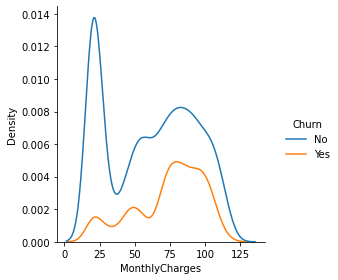

In [21]:
sns.displot(data=df,x="MonthlyCharges",hue="Churn",kind="kde",height=4);

Churn rate is very low when monthly charges is lower than aprroximately 25 units. Otherwise similiar distribution of customers.

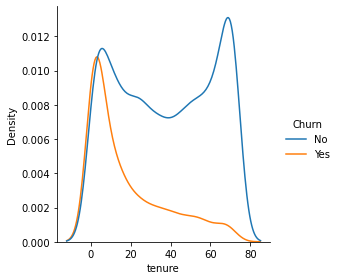

In [22]:
sns.displot(data=df,x="tenure",hue="Churn",kind="kde",height=4);

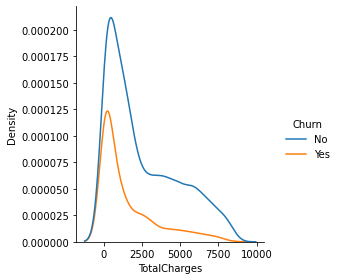

In [23]:
sns.displot(data=df,x="TotalCharges",hue="Churn",kind="kde",height=4);

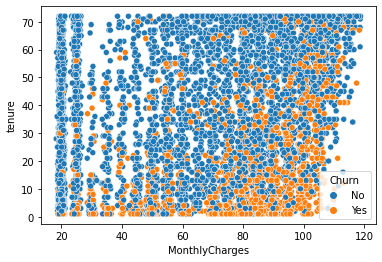

In [24]:
sns.scatterplot(data=df,x="MonthlyCharges",y="tenure",hue="Churn");

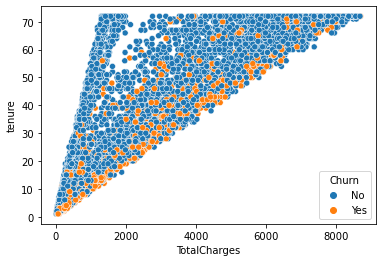

In [25]:
sns.scatterplot(data=df,x="TotalCharges",y="tenure",hue="Churn");

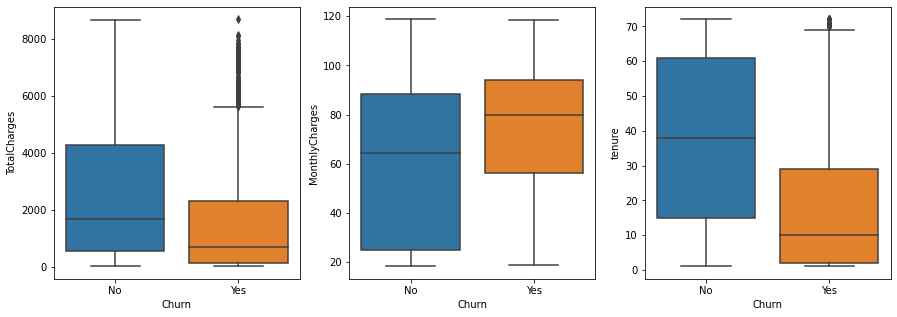

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot( data=df,x='Churn', y=cols[i], ax=axes[i])

In [27]:
# identifying outliers in the Total charges feature who have churned in the past month

lower_quant=df[df['Churn']=='Yes'].TotalCharges.quantile(.25)
upper_quant=df[df['Churn']=='Yes'].TotalCharges.quantile(.75)
iqr=upper_quant-lower_quant
outlier_point = upper_quant+(1.5 * iqr)

outlier_totcharge = df[ (df['Churn']=='Yes') & (df['TotalCharges'] > outlier_point) ]
num_totCharge_outliers = len(outlier_totcharge.index)
avg_spent_outliers = outlier_totcharge.TotalCharges.mean()
tot_spent_outliers = outlier_totcharge.TotalCharges.sum()

print("Number of customers who have paid high amount but discontinued service:", num_totCharge_outliers)
print("Average amount spent by such an average customer:",round( avg_spent_outliers,2))
print("Total amount of business the company is missing out on henceforth:", round(tot_spent_outliers,2))
print("This is about",round((outlier_totcharge.TotalCharges.sum()/df.TotalCharges.sum())*100,2),"% of total turnover that month")

Number of customers who have paid high amount but discontinued service: 109
Average amount spent by such an average customer: 6670.28
Total amount of business the company is missing out on henceforth: 727060.65
This is about 4.53 % of total turnover that month


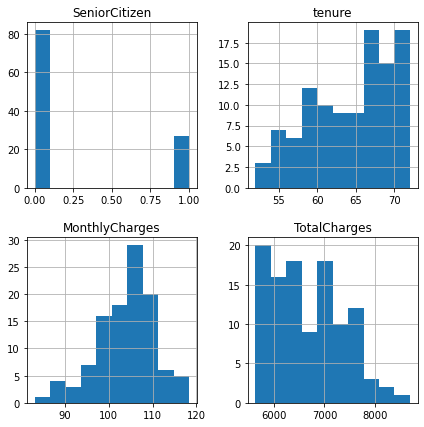

In [28]:
outlier_totcharge.hist(figsize=(7,7));

In [29]:
outlier_totcharge.SeniorCitizen.value_counts(normalize=True)

0    0.752294
1    0.247706
Name: SeniorCitizen, dtype: float64

In [30]:
df.SeniorCitizen.value_counts(normalize=True)

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

## **Analysing Categorical Features**

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


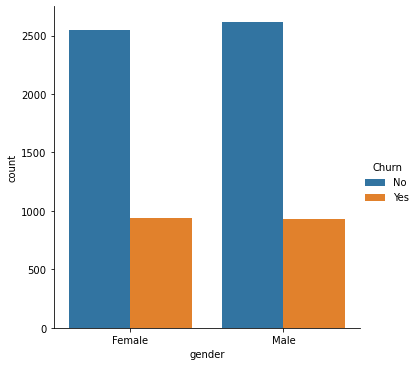

In [32]:
ax=sns.catplot(x="gender",hue="Churn",data=df,kind="count");

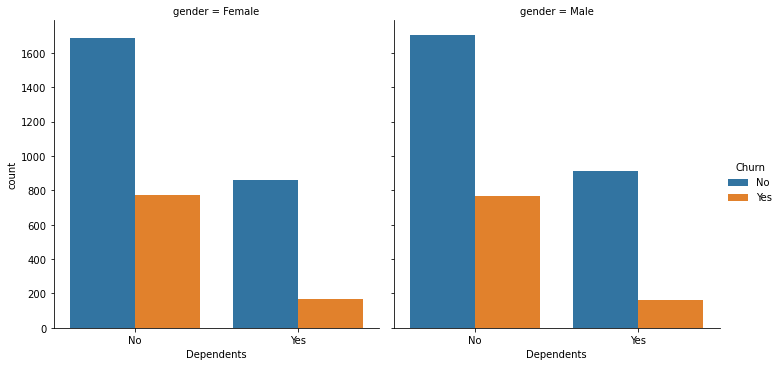

In [33]:
g=sns.catplot(x="Dependents",hue="Churn",data=df,kind="count",col="gender");

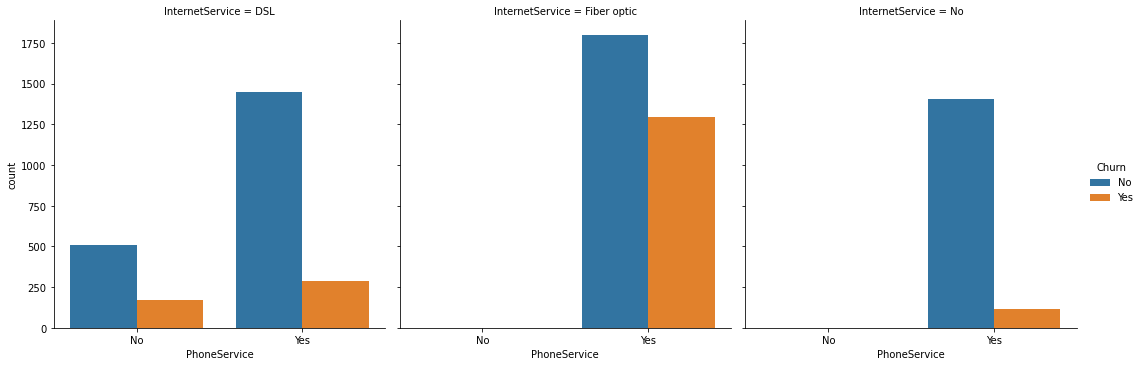

In [34]:
ax=sns.catplot(x="PhoneService",hue="Churn",data=df,kind="count",col="InternetService");

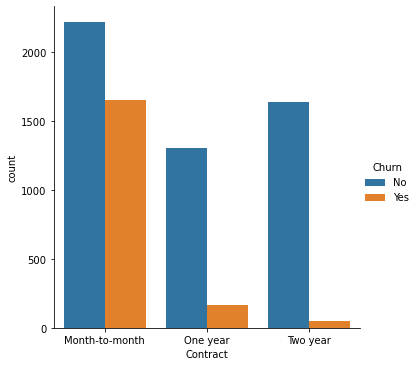

In [35]:
ax=sns.catplot(x="Contract",hue="Churn",data=df,kind="count");

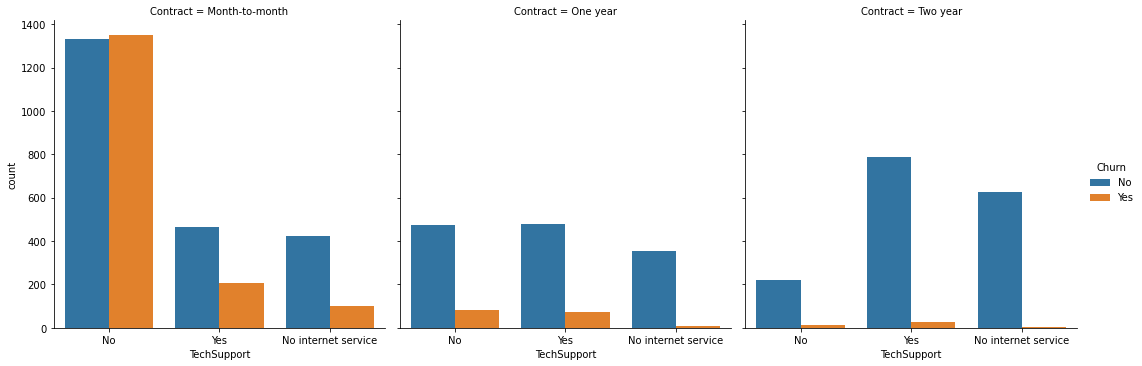

In [36]:
ax=sns.catplot(x="TechSupport",hue="Churn",data=df,kind="count",col="Contract");

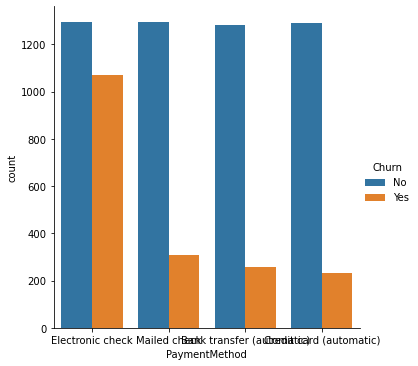

In [37]:
ax=sns.catplot(x="PaymentMethod",hue="Churn",data=df,kind="count");

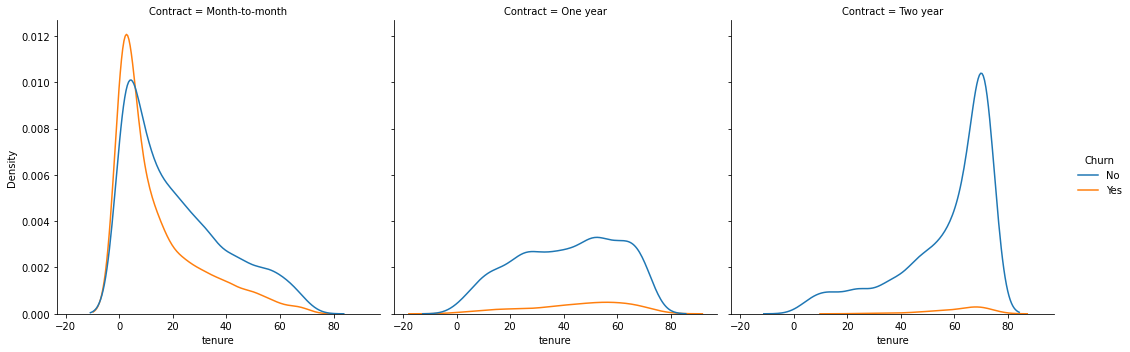

In [38]:
sns.displot(data=df,x="tenure",hue="Churn",col="Contract",kind="kde");

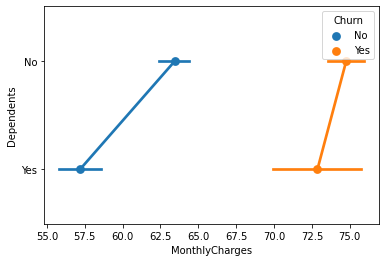

In [39]:
ax=sns.pointplot(x="MonthlyCharges",y="Dependents",hue="Churn",data=df)

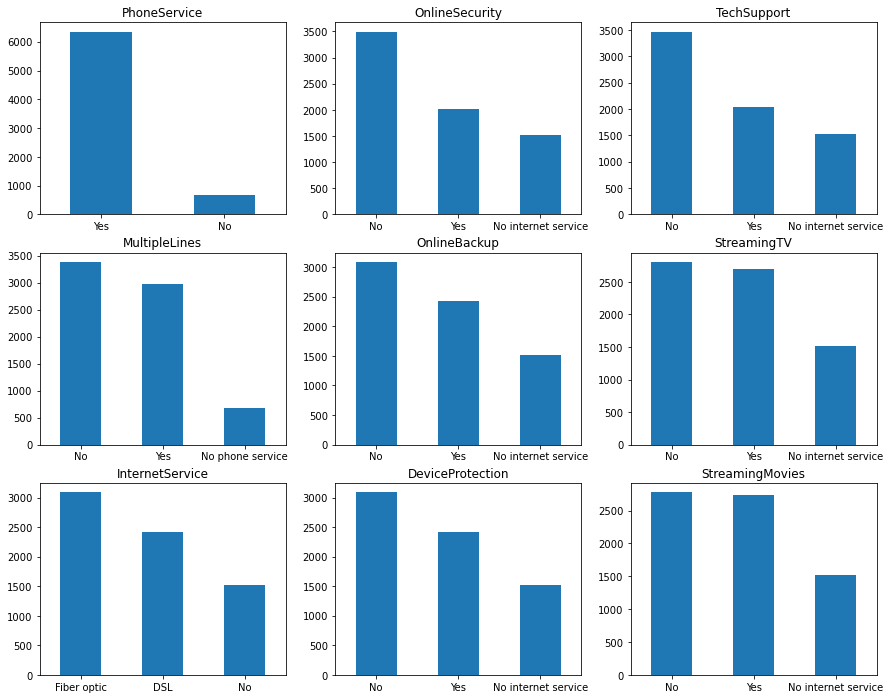

In [40]:
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i,feat in enumerate(services):
    if i<3:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)    
    elif i>=3 and i<6:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)
    elif i<9:
        ax=df[feat].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)    
    ax.set_title(feat)    

In [41]:
df['Count_OnlineServices'] =(df[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport',
                                 'StreamingTV', 'OnlineBackup']]=='Yes').sum(axis=1)

agg=df.replace('Yes',1).replace('No',0).replace('No internet service',0).groupby('Count_OnlineServices',as_index=False)[['Churn']].mean()

agg[['Churn']]=np.round(agg[['Churn']],2)*100

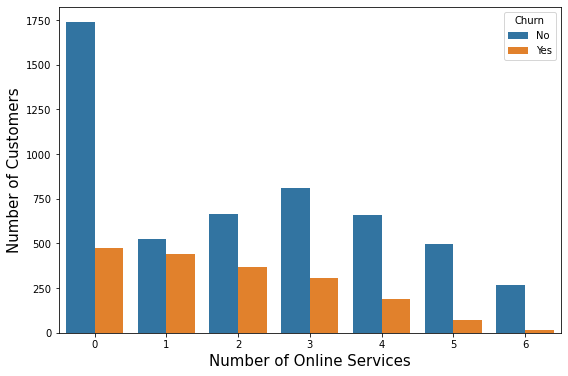

In [42]:
plt.figure(figsize=(9,6))
ax=sns.countplot(x='Count_OnlineServices',hue='Churn',data=df);
ax.set_ylabel('Number of Customers', fontsize=15);
ax.set_xlabel('Number of Online Services',fontsize=15);

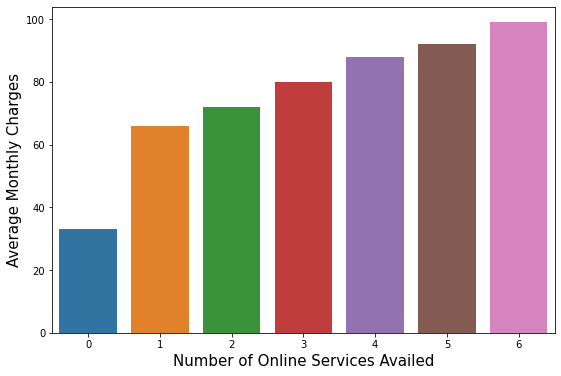

In [43]:
agg = df.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['MonthlyCharges']].mean()
agg[['MonthlyCharges']] = np.round(agg[['MonthlyCharges']], 0)

plt.figure(figsize=(9,6))
ax = sns.barplot(x='Count_OnlineServices',y='MonthlyCharges',data=agg);
ax.set_xlabel('Number of Online Services Availed',fontsize=15);
ax.set_ylabel('Average Monthly Charges',fontsize=15);

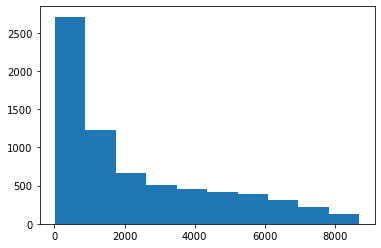

In [44]:
plt.hist(df['TotalCharges']);

In [45]:
df.dtypes

gender                   object
SeniorCitizen             int64
Partner                  object
Dependents               object
tenure                    int64
PhoneService             object
MultipleLines            object
InternetService          object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges            float64
Churn                    object
Count_OnlineServices      int64
dtype: object

# Scaling and encoding 

In [46]:
X=df.drop(["Churn","Count_OnlineServices"],axis=1)
y=df["Churn"]

In [47]:
from sklearn.preprocessing import LabelEncoder

lbe=LabelEncoder()
y=lbe.fit_transform(y)

In [48]:
cat_cols=X.nunique()[X.nunique()<5].keys().tolist()
cat_cols=[x for x in cat_cols if x in X]

num_cols=[x for x in X.columns if x not in cat_cols]

In [49]:
from sklearn.preprocessing import StandardScaler
cat_cols=X.nunique()[X.nunique()<5].keys().tolist()
cat_cols=[x for x in cat_cols if x in X]

num_cols=[x for x in X.columns if x not in cat_cols]




std=StandardScaler()
sc_num=std.fit_transform(X[num_cols])
sc_num=pd.DataFrame(sc_num,columns=num_cols)

In [50]:
bin_cols=X.nunique()[X.nunique() == 2].keys().tolist()
multi_cols=[x for x in cat_cols if x not in bin_cols]


#Label encoding Binary columns
for x in bin_cols :
    X[x]=lbe.fit_transform(X[x])

# Creating a subgroup of categorical columns of multiclass features and encoding them with dummies.
X=pd.get_dummies(data=X,columns=multi_cols,drop_first=True )

In [51]:
#Updating dataframe with new Features
X=X.copy()
X=X.drop(columns=num_cols,axis=1)
X=X.merge(sc_num,left_index=True,right_index=True,how="left")

X.shape

(7032, 30)

In [52]:
feature_names=X.columns.tolist()

In [53]:
for col in X.columns:
    if X[col].dtype=='float64':X[col]=df[col].astype('float32')
    if X[col].dtype=='int64':X[col]=X[col].astype('int32')
    if X[col].dtype=='uint8':X[col]=X[col].astype('int32')

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(v):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values,i) for i in range(v.shape[1])]

    high_vif = vif[vif["VIF"] > 5].sort_values("VIF",ascending=False)

    
    return(high_vif)

In [55]:
calc_vif(X)

,variables,VIF
18,StreamingTV_No internet service,inf
9,InternetService_No,inf
10,OnlineSecurity_No internet service,inf
12,OnlineBackup_No internet service,inf
20,StreamingMovies_No internet service,inf
14,DeviceProtection_No internet service,inf
16,TechSupport_No internet service,inf
4,PhoneService,1773.528800
28,MonthlyCharges,866.089633
8,InternetService_Fiber optic,148.500813


In [56]:
X1=X.drop(['StreamingTV_No internet service','InternetService_No',
          'OnlineSecurity_No internet service','OnlineBackup_No internet service',
          'StreamingMovies_No internet service','DeviceProtection_No internet service',
           'TechSupport_No internet service','PhoneService'],axis=1)
calc_vif(X1)

,variables,VIF
20,MonthlyCharges,43.328521
21,TotalCharges,19.020737
19,tenure,17.486776
7,InternetService_Fiber optic,9.218126


## 4. Data pre-processing: 

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size =0.2,random_state =1,stratify=y)

print(Counter(y_train))

Counter({0: 4130, 1: 1495})


In [58]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y,test_size = 0.2,random_state = 1,stratify=y)

In [59]:
from imblearn.over_sampling import SMOTE

osmote=SMOTE()
Xs_train,ys_train=osmote.fit_resample(X_train,y_train)
Xs_test,ys_test=osmote.fit_resample(X_test,y_test)

print(Counter(ys_train))

Counter({0: 4130, 1: 4130})


In [60]:
rus=RandomUnderSampler()
Xrus_train,yrus_train =rus.fit_resample(X_train,y_train)
Xrus_test,yrus_test   =rus.fit_resample(X_test,y_test)

print(Counter(yrus_train))

Counter({0: 1495, 1: 1495})


In [61]:
from imblearn.under_sampling import TomekLinks

tl=TomekLinks()
Xtl_train,ytl_train =tl.fit_resample(X_train,y_train)
Xtl_test,ytl_test   =tl.fit_resample(X_test,y_test)

print(Counter(ytl_train))

Counter({0: 3669, 1: 1495})


In [62]:
from imblearn.under_sampling import ClusterCentroids

cc=ClusterCentroids()
Xcc_train,ycc_train =cc.fit_resample(X_train,y_train)
Xcc_test,ycc_test   =cc.fit_resample(X_test,y_test)

print(Counter(ycc_train))

Counter({0: 1495, 1: 1495})


## 5. Model training, testing and tuning: 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
classifiers = [['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['LogisticRegression :', LogisticRegression()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Bagging :', BaggingClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

for name,classifier in classifiers:
    clf=classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )
    
    
    
    
    #print ("\n Classification report : \n",classification_report(y_test,y_pred))
    #print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    #conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    #model_roc_auc = roc_auc_score(testing_y,predictions) 
    #print ("Area under curve : ",model_roc_auc,"\n")
    #fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])


 Naive Bayes : 

Training Score for Naive Bayes :  66.22
Testing Score for Naive Bayes : 63.75
Classification report  
               precision    recall  f1-score   support

           0       0.91      0.56      0.69      1033
           1       0.41      0.85      0.56       374

    accuracy                           0.64      1407
   macro avg       0.66      0.71      0.62      1407
weighted avg       0.78      0.64      0.66      1407

Confusion matrix  
 [[578 455]
 [ 55 319]]
ROC AUC  : 0.7062382552246455

 KNeighbours : 

Training Score for KNeighbours :  82.79
Testing Score for KNeighbours : 76.76
Classification report  
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.58      0.44      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.75      0.77      0.76      1407

Confusion matrix  
 [[915 118]


In [65]:
for name,classifier in classifiers:
    clf=classifier.fit(X1_train,y1_train)
    y_pred=classifier.predict(X1_test)
    print(f'Training Score for {name} : {clf.score(X1_train,y1_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(X1_test,y1_test) * 100:.2f}' )

Training Score for Naive Bayes : : 75.56
Testing Score for Naive Bayes : : 73.85
Training Score for KNeighbours : : 82.77
Testing Score for KNeighbours : : 76.76
Training Score for SVM : : 73.42
Testing Score for SVM : : 73.42
Training Score for LogisticRegression : : 80.62
Testing Score for LogisticRegression : : 79.39
Training Score for DecisionTree : : 99.72
Testing Score for DecisionTree : : 73.06
Training Score for RandomForest : : 99.72
Testing Score for RandomForest : : 78.46
Training Score for Bagging : : 97.87
Testing Score for Bagging : : 77.68
Training Score for AdaBoostClassifier : : 80.96
Testing Score for AdaBoostClassifier : : 79.18
Training Score for GradientBoostingClassifier:  : 82.99
Testing Score for GradientBoostingClassifier:  : 79.53
[16:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

In [66]:
for name,classifier in classifiers:
    clf=classifier.fit(Xs_train,ys_train)
    ys_pred=classifier.predict(Xs_test)
    print(f'Training Score for {name} : {clf.score(Xs_train,ys_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xs_test,ys_test) * 100:.2f}' )

Training Score for Naive Bayes : : 78.33
Testing Score for Naive Bayes : : 77.44
Training Score for KNeighbours : : 83.90
Testing Score for KNeighbours : : 69.31
Training Score for SVM : : 66.73
Testing Score for SVM : : 65.00
Training Score for LogisticRegression : : 82.92
Testing Score for LogisticRegression : : 81.66
Training Score for DecisionTree : : 99.79
Testing Score for DecisionTree : : 72.89
Training Score for RandomForest : : 99.79
Testing Score for RandomForest : : 81.27
Training Score for Bagging : : 98.90
Testing Score for Bagging : : 80.06
Training Score for AdaBoostClassifier : : 83.21
Testing Score for AdaBoostClassifier : : 81.61
Training Score for GradientBoostingClassifier:  : 85.28
Testing Score for GradientBoostingClassifier:  : 82.48
[16:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

In [67]:
for name,classifier in classifiers:
    clf=classifier.fit(Xrus_train,yrus_train)
    y_pred=classifier.predict(Xrus_test)
    print(f'Training Score for {name} : {clf.score(Xrus_train,yrus_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xrus_test,yrus_test) * 100:.2f}' )

Training Score for Naive Bayes : : 73.04
Testing Score for Naive Bayes : : 70.99
Training Score for KNeighbours : : 79.23
Testing Score for KNeighbours : : 69.79
Training Score for SVM : : 63.18
Testing Score for SVM : : 60.83
Training Score for LogisticRegression : : 77.09
Testing Score for LogisticRegression : : 75.40
Training Score for DecisionTree : : 99.77
Testing Score for DecisionTree : : 68.05
Training Score for RandomForest : : 99.77
Testing Score for RandomForest : : 75.67
Training Score for Bagging : : 98.39
Testing Score for Bagging : : 72.86
Training Score for AdaBoostClassifier : : 78.46
Testing Score for AdaBoostClassifier : : 75.13
Training Score for GradientBoostingClassifier:  : 81.77
Testing Score for GradientBoostingClassifier:  : 75.13
[16:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

In [68]:
for name,classifier in classifiers:
    clf=classifier.fit(Xtl_train,ytl_train)
    y_pred=classifier.predict(Xtl_test)
    print(f'Training Score for {name} : {clf.score(Xtl_train,ytl_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xtl_test,ytl_test) * 100:.2f}' )

Training Score for Naive Bayes : : 69.07
Testing Score for Naive Bayes : : 67.44
Training Score for KNeighbours : : 84.24
Testing Score for KNeighbours : : 76.82
Training Score for SVM : : 71.05
Testing Score for SVM : : 71.01
Training Score for LogisticRegression : : 81.78
Testing Score for LogisticRegression : : 80.78
Training Score for DecisionTree : : 99.69
Testing Score for DecisionTree : : 72.79
Training Score for RandomForest : : 99.69
Testing Score for RandomForest : : 79.69
Training Score for Bagging : : 98.24
Testing Score for Bagging : : 79.07
Training Score for AdaBoostClassifier : : 81.56
Testing Score for AdaBoostClassifier : : 81.01
Training Score for GradientBoostingClassifier:  : 83.42
Testing Score for GradientBoostingClassifier:  : 80.54
[16:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

In [69]:
for name,classifier in classifiers:
    clf=classifier.fit(Xcc_train,ycc_train)
    y_pred=classifier.predict(Xcc_train)
    print(f'Training Score for {name} : {clf.score(Xcc_train,ycc_train) * 100:.2f}' )
    print(f'Testing Score for {name} : {clf.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score for Naive Bayes : : 74.88
Testing Score for Naive Bayes : : 74.87
Training Score for KNeighbours : : 76.62
Testing Score for KNeighbours : : 73.66
Training Score for SVM : : 69.50
Testing Score for SVM : : 67.65
Training Score for LogisticRegression : : 85.55
Testing Score for LogisticRegression : : 86.36
Training Score for DecisionTree : : 100.00
Testing Score for DecisionTree : : 79.68
Training Score for RandomForest : : 100.00
Testing Score for RandomForest : : 84.49
Training Score for Bagging : : 98.70
Testing Score for Bagging : : 84.22
Training Score for AdaBoostClassifier : : 85.32
Testing Score for AdaBoostClassifier : : 84.63
Training Score for GradientBoostingClassifier:  : 89.36
Testing Score for GradientBoostingClassifier:  : 84.49
[16:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

We will therefore use the dataset we have got from resampling using ClusterCentroids for further prediction and fine tuning of model.

# Decision Tree<br>
The Model made using ClusterCentroids gave highest accuracy so we will use that and see if it can be enhanced even more.

In [70]:
dt=DecisionTreeClassifier()
dt.fit(Xcc_train,ycc_train)

DecisionTreeClassifier()

In [71]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(2, 11)}

best_dt = GridSearchCV(DecisionTreeClassifier(random_state=1),tree_params, cv=5)                  
best_dt.fit(Xcc_train,ycc_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(2, 11)})

In [72]:
print("Best params:", best_dt.best_params_)
print("Best cross validaton score", best_dt.best_score_)

Best params: {'max_depth': 5}
Best cross validaton score 0.8177257525083611


In [73]:
tuned_dt = DecisionTreeClassifier(max_depth=9, random_state=1)
tuned_dt.fit(Xcc_train,ycc_train)

print(f'Training Score : {tuned_dt.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {tuned_dt.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score : 92.27
Testing Score : 79.95


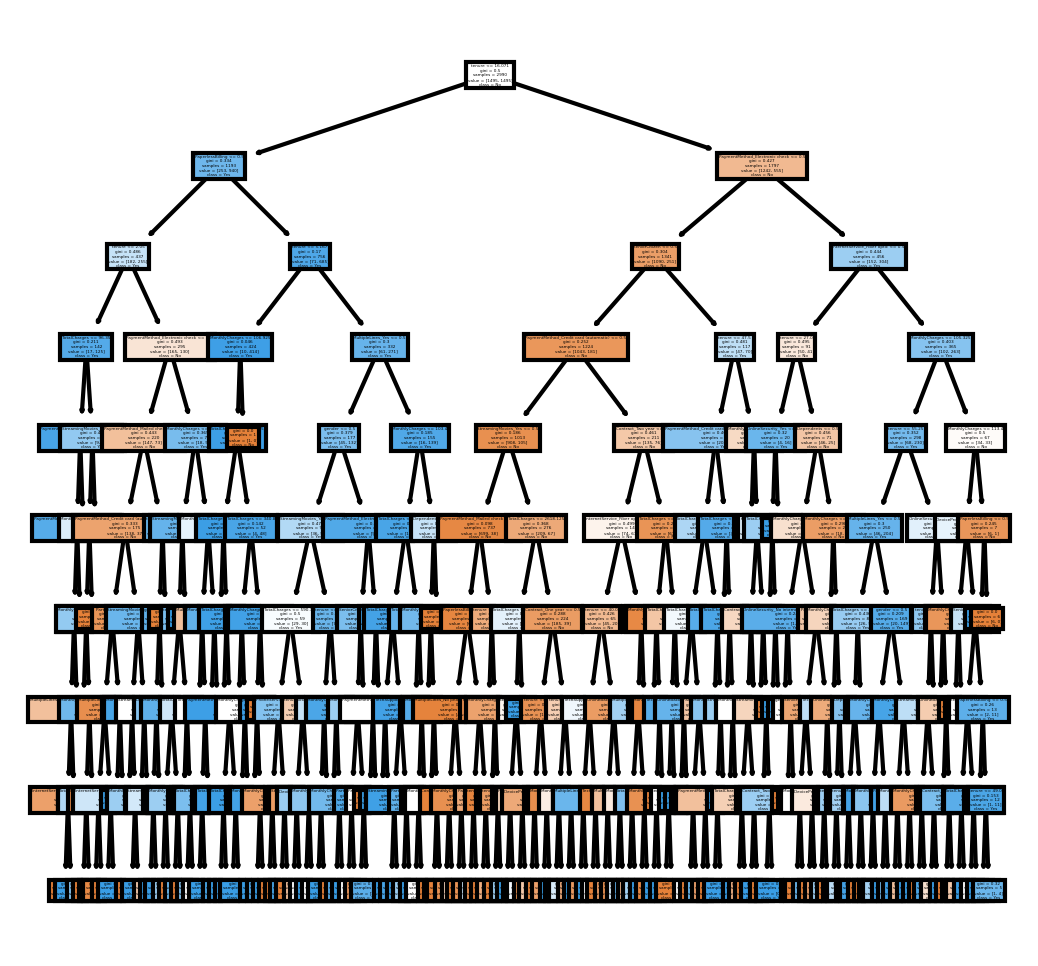

In [74]:
from sklearn.tree import plot_tree

fn = list(Xcc_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300);
plot_tree(tuned_dt, feature_names = fn, class_names=cn, filled = True);

In [75]:
#print (pd.DataFrame(tuned_dt.feature_importances_, columns = ["Imp"], index = Xcc_train.columns))

importances = pd.DataFrame({'feature':Xcc_train.columns,'importance':np.round(tuned_dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
27,tenure,0.391
25,PaymentMethod_Electronic check,0.157
28,MonthlyCharges,0.077
5,PaperlessBilling,0.057
29,TotalCharges,0.056
1,SeniorCitizen,0.041
24,PaymentMethod_Credit card (automatic),0.035
26,PaymentMethod_Mailed check,0.027
21,StreamingMovies_Yes,0.024
2,Partner,0.021


It is clear from this table that the tree model is using "tenure" as the most important feature to predict target followed by customers who would  "PaymentMethod_Electronic check" further followed by "MonthlyCharges" , as the top 3 most important features<br>
6 out of 30 features are not used in preduction.<br>
9 out of the rest have less than 1 % influence on prediction.<br>

In [76]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [7],
              "max_features": range(8, 20),
              "min_samples_leaf": range(1, 9),
              'min_samples_split': [4,7,10],
              'ccp_alpha':[0,.001,.0015,.002],
              'max_features':['auto','log2',None],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tuned_dt, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(Xcc_train,ycc_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.002}
Best score is 0.8250836120401338


In [77]:
print(tree_cv.score(Xcc_train, ycc_train))
print(tree_cv.score(Xcc_test, ycc_test))

0.8424749163879599
0.8088235294117647


As we can see We have optimised this model performs much better after pre and post pruning.
it has transformed from a highly overfit data of 79% accuracy to a very balanced model of `~84% test accuracy.

In [78]:
def plot_confusionmatrix(ycc_train_pred,ycc_train):
    print(f' Confusion matrix')
    cm = confusion_matrix(dt_test_pred,ycc_train)
    sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Test accuracy score 80.88 %
 Confusion matrix


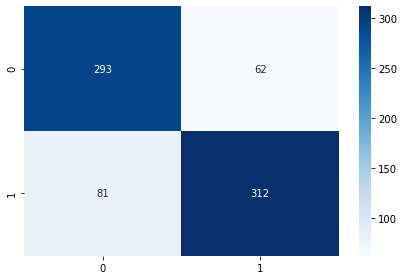

In [79]:
dt_model = tree_cv.best_estimator_
dt_model.fit(Xcc_train,ycc_train)
dt_train_pred = dt_model.predict(Xcc_train)
dt_test_pred = dt_model.predict(Xcc_test)

print(f'Test accuracy score {accuracy_score(dt_test_pred,ycc_test)* 100:.2f} %')
plot_confusionmatrix(dt_test_pred,ycc_test)

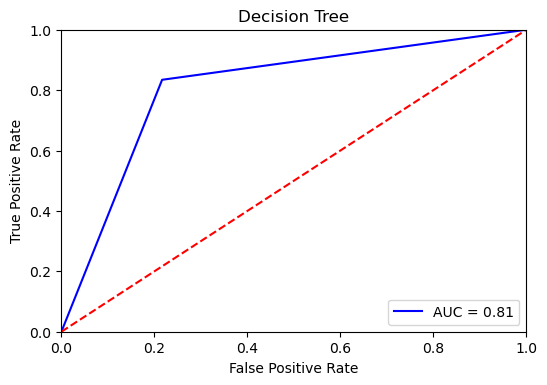

In [80]:
probs = dt_model.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Decision Tree')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

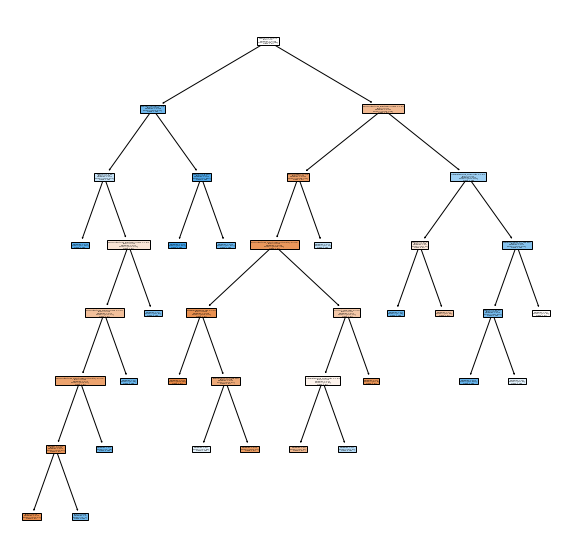

In [81]:
from sklearn import tree

plt.figure(figsize=(10,10))
features = Xcc_train.columns
classes = ['0','1']
tree.plot_tree(dt_model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [82]:
print(classification_report(ycc_test, dt_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       374
           1       0.79      0.83      0.81       374

    accuracy                           0.81       748
   macro avg       0.81      0.81      0.81       748
weighted avg       0.81      0.81      0.81       748



We can now see a much smaller tree that has been pruned from the earlier size we saw at the start.<br>
This tree gives better predictions therefore the pruning has been meaningful which is further emphasized by a good auc and f1 score.<br>
As we saw earliear the class imbalance has been dealt with very well with the Cluster centroids,it got enhanced with pruning and tuning techniques.

# Bagging
Applying bagging on the final decision tree model.

In [83]:
bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=20,max_features=23,random_state=1).fit(Xcc_train, ycc_train)

In [84]:
bgcl_pred=bgcl.predict(Xcc_test)

print(f'Training Score : {bgcl.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {bgcl.score(Xcc_test,ycc_test) * 100:.2f}' )

Training Score : 86.86
Testing Score : 83.16


Bagging has slightly increased accuracy by 1 %.

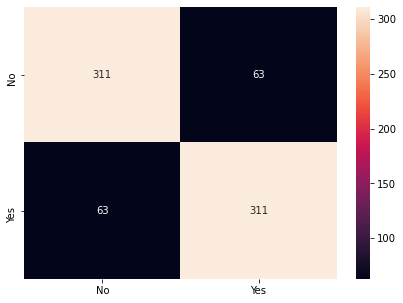

In [85]:
cm=confusion_matrix(ycc_test,bgcl_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

In [86]:
print(classification_report(ycc_test, bgcl_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       374
           1       0.83      0.83      0.83       374

    accuracy                           0.83       748
   macro avg       0.83      0.83      0.83       748
weighted avg       0.83      0.83      0.83       748



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.809
Bagging: ROC AUC=0.832


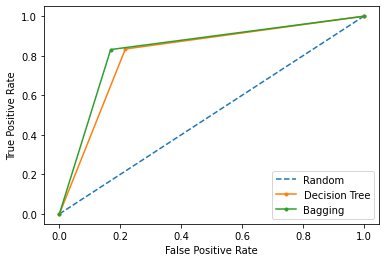

In [87]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

Bagging increase accuracy by 1 percent, True positves and true negatives have both increased uniformly compared to the final decision tree model.We can even see this reflected in the slight increase in AUC value of 0.85 from 0.84 and f1 score.

# Gradient Boosting
This base model was one of the front runners on the ClusterCentroids resampled dataframe with a Training accuracy of 89% and testing accuracy of 86%.Lets try to optimise this further. 

In [88]:
gbcl=GradientBoostingClassifier()
gbcl.fit(Xcc_train,ycc_train)

GradientBoostingClassifier()

In [89]:
gbcl.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

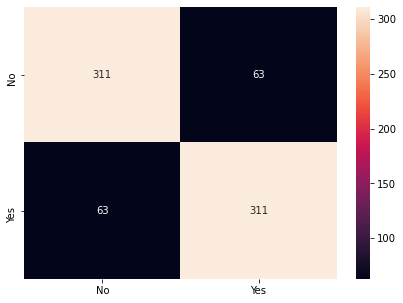

In [90]:
cm=confusion_matrix(ycc_test,bgcl_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

# Random Forest
This model had was more on the overfit than balanced side with a very high Training accuracy of 99% and a commparitively low testing of 78%.Lets optimise this and see if it can give accuracy close to other ensemble models.

In [91]:
rf =RandomForestClassifier(random_state=1)
rf.fit(Xcc_train,ycc_train)

RandomForestClassifier(random_state=1)

In [92]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [93]:
rf = RandomForestClassifier(random_state=1)
rf_params = {'ccp_alpha':[0,0.001,0.002],
             'criterion':['gini','entropy'],
             'max_depth':[3,4,5],
             'max_features':['auto','log2']}

rf_grid = GridSearchCV(estimator=rf,param_grid=rf_params,cv=5,verbose=1,n_jobs=-1)

tuned_rf = rf_grid.fit(Xcc_train, ycc_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [94]:
rf_grid.best_params_

{'ccp_alpha': 0,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2'}

In [95]:
rf_pred=tuned_rf.predict(Xcc_test)

print("Accuracy on Train set : ", tuned_rf.score(Xcc_train,ycc_train))
print("Accuracy on Test set  : ", tuned_rf.score(Xcc_test,ycc_test))

Accuracy on Train set :  0.8595317725752508
Accuracy on Test set  :  0.8435828877005348


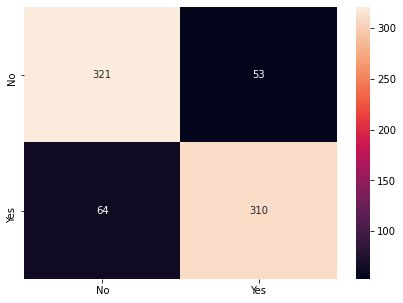

In [96]:
cm=confusion_matrix(ycc_test,rf_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

0.6695095948827292


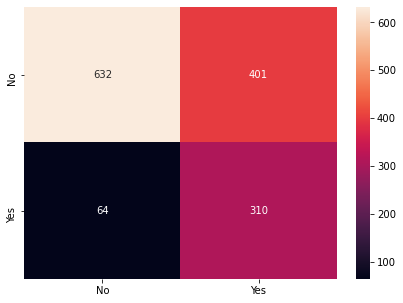

In [97]:
y_predict=tuned_rf.predict(X_test)

print(tuned_rf.score(X_test,y_test))

cm=confusion_matrix(y_test,y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm,annot=True,fmt='g');

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.53571429 0.55809698 0.55779817]
Random Forest F1_score: 55.05% +/- (1.05)


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.809
Bagging: ROC AUC=0.832
Random Forest: ROC AUC=0.844


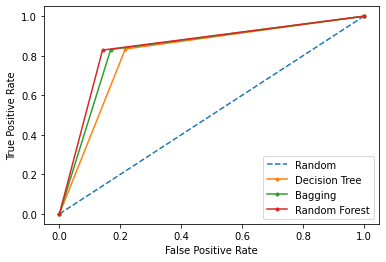

In [99]:
bgcl_probs = [0 for _ in range(len(ycc_test))]
bgcl_probs = bgcl.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, bgcl_pred)
roc_auc = metrics.auc(fpr,tpr)

fpr, tpr, threshold = metrics.roc_curve(ycc_test, dt_test_pred)

ns_probs = [0 for _ in range(len(ycc_test))]
ns_auc = roc_auc_score(ycc_test, ns_probs)
dt_auc1 = roc_auc_score(ycc_test, dt_test_pred)
bgcl_auc2 = roc_auc_score(ycc_test, bgcl_pred)
#gbcl_auc3 = roc_auc_score(ycc_test, gbcl_pred)
#xgbcl_auc4 = roc_auc_score(ycc_test, xgbcl_pred)
rf_auc5 = roc_auc_score(ycc_test, rf_pred)

#find ROC score:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc1))
print('Bagging: ROC AUC=%.3f' % (bgcl_auc2))
#print('Gradient Boosting: ROC AUC=%.3f' % (gbcl_auc3))
#print('XGBM: ROC AUC=%.3f' % (xgbcl_auc4))
print('Random Forest: ROC AUC=%.3f' % (rf_auc5))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ycc_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ycc_test, dt_test_pred)
bgcl_fpr, bgcl_tpr, _ = roc_curve(ycc_test, bgcl_pred)
#gbcl_fpr, gbcl_tpr, _ = roc_curve(ycc_test, gbcl_pred)
#xgbcl_fpr, xgbcl_tpr, _ = roc_curve(ycc_test, xgbcl_pred)
rf_fpr, rf_tpr, _ = roc_curve(ycc_test, rf_pred)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(bgcl_fpr, bgcl_tpr, marker='.', label='Bagging')
#pyplot.plot(gbcl_fpr, gbcl_tpr, marker='.', label='Gradient Boosting')
#pyplot.plot(xgbcl_fpr, xgbcl_tpr, marker='.', label='XGBM')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend();

In [100]:
print(classification_report(ycc_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       374
           1       0.85      0.83      0.84       374

    accuracy                           0.84       748
   macro avg       0.84      0.84      0.84       748
weighted avg       0.84      0.84      0.84       748



# Pickle
Saving the gradient boosting modedl for pickle as it had the best f1 score

In [101]:
import pickle 

#our best model has been
best_model=GradientBoostingClassifier(random_state=1,
                                      learning_rate= 0.2,
                                      max_depth= 3,
                                      max_features= 'log2',
                                      n_estimators= 500,
                                      subsample= 0.8) 

best_model.fit(Xcc_train,ycc_train)


# Save the trained model as a pickle string. 
saved_model = pickle.dumps(best_model) 


# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(Xcc_test, ycc_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(Xcc_test)

Test score: 86.90 %


In [102]:
# GUI development

In [103]:
from tkinter import *
from tkinter.ttk import *


#App Window
window = Tk()
window.title("CHURN PREDICTOR")
window.geometry('1000x1000+10+10')

def input():
    df_val = pd.DataFrame
    data = []
    
    gender_val=gender_combo.get()
    SeniorCitizen_val=SeniorCitizen_combo.get()
    Partner_val=Partner_combo.get()
    Dependents_val=Dependents_combo.get()
    tenure_val=tenure_txt.get()
    PhoneService_val=PhoneService_combo.get()
    MultipleLines_val=MultipleLines_combo.get()
    InternetService_val=InternetService_combo.get()
    OnlineSecurity_val=OnlineSecurity_combo.get()
    OnlineBackup_val=OnlineBackup_combo.get()
    DeviceProtection_val=DeviceProtection_combo.get()
    TechSupport_val=TechSupport_combo.get()
    StreamingTV_val=StreamingTV_combo.get()
    StreamingMovies_val=StreamingMovies_combo.get()
    Contract_val=Contract_combo.get()
    PaperlessBilling_val=PaperlessBilling_combo.get()
    PaymentMethod_val=PaymentMethod_combo.get()
    MonthlyCharges_val=MonthlyCharges_txt.get()
    TotalCharges_val=TotalCharges_txt.get()
    
    data.append([gender_val, SeniorCitizen_val, Partner_val,Dependents_val,tenure_val,PhoneService_val,MultipleLines_val,
                InternetService_val,OnlineSecurity_val,OnlineBackup_val,DeviceProtection_val,TechSupport_val,StreamingTV_val,
                StreamingMovies_val,Contract_val,PaperlessBilling_val,PaymentMethod_val,MonthlyCharges_val,TotalCharges_val])
    
    df_val = pd.DataFrame(data)
    print(df_val)
    df_val.columns =['gender_col', 'SeniorCitizen_col','Partner_col', 'Dependents_col','tenure_col','PhoneService_col',
                     'MultipleLines_col','InternetService_col','OnlineSecurity_col','OnlineBackup_col','DeviceProtection_col',
                     'TechSupport_col','StreamingTV_col','StreamingMovies_col','Contract_col','PaperlessBilling_col',
                     'PaymentMethod_col','MonthlyCharges_col','TotalCharges_col']
    
   
    sort_nums_val = {"Contract_col": {"Month-to-month":0, "One year":1, "Two year":2},
                     "PaymentMethod_col": {"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":2,
                     "Credit card (automatic)":3}}
    
    df_val= df_val.replace(sort_nums_val)
    best_model=GradientBoostingClassifier()
    best_model = best_model.fit(Xcc_train,ycc_train)
    pred = best_model.predict(df_val)
    prediction=float(pred)
    print(prediction)
    
    if pred == 0:
        Predict_txt.insert(0,"Loyal")
    else:
        Predict_txt.insert(1,"Will Churn!!!")
                           
                           
                     
gender_lbl = Label(window, text="Gender(m=0,f=1)")
gender_lbl.grid(column=0, row=0)
gender_combo = Combobox(window)
gender_combo['values']= ("0","1")
gender_combo.grid(column=1, row=0)

SeniorCitizen_lbl = Label(window, text="Senior Citizen(n=0,y=1)")
SeniorCitizen_lbl.grid(column=0, row=1)
SeniorCitizen_combo = Combobox(window)
SeniorCitizen_combo['values']= (0,1)
SeniorCitizen_combo.grid(column=1, row=1)

Partner_lbl = Label(window, text="Partner(n=0,y=1)")
Partner_lbl.grid(column=0, row=2)
Partner_combo = Combobox(window)
Partner_combo['values']= ("0","1")
Partner_combo.grid(column=1, row=2)

Dependents_lbl = Label(window, text="Dependents(n=0,y=1)")
Dependents_lbl.grid(column=0, row=3)
Dependents_combo = Combobox(window)
Dependents_combo['values']= ("0","1")
Dependents_combo.grid(column=1, row=3)


tenure_lbl=Label(window, text='Tenure(months)')
tenure_lbl.grid(column=0, row=4)
tenure_txt = Entry(window,width=22)
tenure_txt.grid(column=1, row=4)


PhoneService_lbl = Label(window, text="Phone Services(n=0,y=1)")
PhoneService_lbl.grid(column=0, row=5)
PhoneService_combo = Combobox(window)
PhoneService_combo['values']= ("0","1")
PhoneService_combo.grid(column=1, row=5)


MultipleLines_lbl = Label(window, text="Multiple Lines(n=0,y=1)")
MultipleLines_lbl.grid(column=0, row=6)
MultipleLines_combo = Combobox(window)
MultipleLines_combo['values']= ("0", "1")
MultipleLines_combo.grid(column=1, row=6)

InternetService_lbl = Label(window, text="Internet Services(n=0,y=1)")
InternetService_lbl.grid(column=0, row=7)
InternetService_combo = Combobox(window)
InternetService_combo['values']= ("0", "1")
InternetService_combo.grid(column=1, row=7)

OnlineSecurity_lbl = Label(window, text="Online Security(n=0,y=1)")
OnlineSecurity_lbl.grid(column=0, row=8)
OnlineSecurity_combo = Combobox(window)
OnlineSecurity_combo['values']= ("0", "1")
OnlineSecurity_combo.grid(column=1, row=8)

OnlineBackup_lbl = Label(window, text="Online Backup(n=0,y=1)")
OnlineBackup_lbl.grid(column=0, row=9)
OnlineBackup_combo = Combobox(window)
OnlineBackup_combo['values']= ("0", "1")
OnlineBackup_combo.grid(column=1, row=9)


DeviceProtection_lbl = Label(window, text="Device Protection(n=0,y=1)")
DeviceProtection_lbl.grid(column=0, row=10)
DeviceProtection_combo = Combobox(window)
DeviceProtection_combo['values']= ("0", "1")
DeviceProtection_combo.grid(column=1, row=10)                           
                           
TechSupport_lbl = Label(window, text="Tech Support(n=0,y=1)")
TechSupport_lbl.grid(column=0, row=11)
TechSupport_combo = Combobox(window)
TechSupport_combo['values']= ("0", "1")
TechSupport_combo.grid(column=1,row=11)

StreamingTV_lbl = Label(window, text="Streaming TV(n=0,y=1)")
StreamingTV_lbl.grid(column=0, row=12)
StreamingTV_combo = Combobox(window)
StreamingTV_combo['values']= ("No","Yes","No internet service")
StreamingTV_combo.grid(column=1, row=12)
                           
StreamingMovies_lbl = Label(window, text="Streaming Movies(n=0,y=1)")
StreamingMovies_lbl.grid(column=0, row=13)
StreamingMovies_combo = Combobox(window)
StreamingMovies_combo['values']= ("No","Yes","No internet service")
StreamingMovies_combo.grid(column=1, row=13)

Contract_lbl = Label(window, text="Contract")
Contract_lbl.grid(column=0, row=14)
Contract_combo = Combobox(window)
Contract_combo['values']= ("One year", "Two year", "Month-to-month")
Contract_combo.grid(column=1, row=14)
                        
PaperlessBilling_lbl = Label(window, text="Paperless Billing(n=0,y=1)")
PaperlessBilling_lbl.grid(column=0, row=15)
PaperlessBilling_combo = Combobox(window)
PaperlessBilling_combo['values']= ("0", "1")
PaperlessBilling_combo.grid(column=1, row=15)

PaymentMethod_lbl = Label(window, text="Payment Method")
PaymentMethod_lbl.grid(column=0, row=16)
PaymentMethod_combo = Combobox(window)
PaymentMethod_combo['values']= ("Electronic check", "Mailed check", "Bank transfer (automatic)","Credit card (automatic)")
PaymentMethod_combo.grid(column=1, row=16)

MonthlyCharges_lbl=Label(window, text='Monthly Charges')
MonthlyCharges_lbl.grid(column=0, row=17)
MonthlyCharges_txt = Entry(window,width=22)
MonthlyCharges_txt.grid(column=1, row=17)

TotalCharges_lbl=Label(window, text='Total Charges')
TotalCharges_lbl.grid(column=0, row=18)
TotalCharges_txt = Entry(window,width=22)
TotalCharges_txt.grid(column=1, row=18)


lbl = Label(window, text="Submit")
lbl.grid(column=0, row=19)   
btn = Button(window, text="Submit", command=input)
btn.grid(column=0, row=19)


Predict_lbl = Label(window, text="Predict")
Predict_lbl.grid(column=0, row=20)
Predict_txt = Entry(window,width=25)
Predict_txt.grid(column=1, row=20)

                        

window.mainloop()

## 6. Conclusion and improvisation: 

To conclude

We recieved an aseembled dataset of good volume but was imbalanced so features had to be modified for best model tuning.<br>
The data being collected has a monthly velocity which can be used to study over months to vreate an even more effecient model to pick out patterns over larger span of time.<be>
There were small issues in data input which we easily fixed, apart from that the veracity of data is good.<br>
While visulising the data we could see a lot of intuitive elements represented as expected which indicates a good validity of the dataset as well.
We are getting an accuracy reading of about 80-85 percent by different methods with Gadient Boositing give 87% on new data.
Without Feature enggineering considering the  raw class imbalance these accuracy scores drop by around 10 percent.<br>
A larger Datset which does not have misbalance would be ideal.<br>
But given real world contradictions customer sets overlap hence achieving higher accuracy scores (like > 95%) is difficult for the classifiers to identify as perfect decision boundary without sacrificing either precision or recall.<br>
Also more features which tell us about the customer would be appreciated..<br>
A comparative market analysis would be helpful to diagnose more accurately why are the customers Churning.
The online streaming services is good example for that,most customers are not applying for the feature and even if they do you will find them quitting soon.<br>
People not using TechSupport from the company have higher churn rate.THey should look at making this feature much more aaccesible.<br>
Customers who like features from the company tend to stay, so new plans and analysis should be done along with market study around existing feature,their pricing study,how they can be offered in combination with other features.
The company would highly benefit with an improved retention strategy while they try to solve how to make new customers stay in the platform.